/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU: True


100%|████████████████████████████████| 5000/5000 [00:42<00:00, 117.98it/s, Iter=5000, Loss=5.39e-01]


Adam done!
Iter: 6000 Loss: 0.1284717321395874
Iter: 7000 Loss: 0.07555977255105972
Iter: 8000 Loss: 0.049360241740942
Iter: 9000 Loss: 0.034835442900657654
Iter: 10000 Loss: 0.021345490589737892
Iter: 11000 Loss: 0.014431089162826538
Iter: 12000 Loss: 0.01013016328215599
Iter: 13000 Loss: 0.006768122781068087
Iter: 14000 Loss: 0.004002531059086323
Iter: 15000 Loss: 0.0023577166721224785
Iter: 16000 Loss: 0.001611779909580946
Iter: 17000 Loss: 0.001104082795791328
LBGFS done!
change_counts 0 Test_L2error: 8.97e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 119.27it/s, Iter=22996, Loss=1.91e-02]


Adam done!
Iter: 23000 Loss: 11.422348022460938
Iter: 24000 Loss: 0.0013330462388694286
Iter: 25000 Loss: 0.0009232850861735642
LBGFS done!
change_counts 1 Test_L2error: 8.30e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 119.54it/s, Iter=30743, Loss=9.02e-03]


Adam done!
Iter: 31000 Loss: 0.003564981510862708
Iter: 32000 Loss: 0.0012169487308710814
Iter: 33000 Loss: 0.0009076785063371062
LBGFS done!
change_counts 2 Test_L2error: 8.71e-03


 48%|██████████████▊                | 2386/5000 [00:20<00:21, 119.95it/s, Iter=35921, Loss=3.09e-02]

Iter: 55000 Loss: 0.0011438910150900483
Iter: 56000 Loss: 0.0009082960314117372
LBGFS done!
change_counts 5 Test_L2error: 7.83e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 119.93it/s, Iter=61067, Loss=5.74e-01]


Adam done!
Iter: 62000 Loss: 0.0016225354047492146
Iter: 63000 Loss: 0.0012190297711640596
LBGFS done!
change_counts 6 Test_L2error: 8.33e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 120.21it/s, Iter=68077, Loss=8.33e-03]


Adam done!
Iter: 69000 Loss: 0.0017208503559231758
Iter: 70000 Loss: 0.0012391135096549988
Iter: 71000 Loss: 0.0009579412289895117
LBGFS done!
change_counts 7 Test_L2error: 6.65e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 119.68it/s, Iter=76510, Loss=7.49e-01]


Adam done!
Iter: 77000 Loss: 0.001609060913324356
LBGFS done!
change_counts 8 Test_L2error: 7.14e-03


100%|███████████████████████████████| 5000/5000 [00:41<00:00, 119.87it/s, Iter=82913, Loss=2.48e-01]


Adam done!
Iter: 83000 Loss: 0.003621408250182867
Iter: 84000 Loss: 0.0014545798767358065
Iter: 85000 Loss: 0.001109051052480936
Iter: 86000 Loss: 0.0008708625100553036
LBGFS done!
change_counts 9 Test_L2error: 6.45e-03
Training time: 943.03
[[0, '8.97e-03'], [1, '8.30e-03'], [2, '8.71e-03'], [3, '9.04e-03'], [4, '8.24e-03'], [5, '7.83e-03'], [6, '8.33e-03'], [7, '6.65e-03'], [8, '7.14e-03'], [9, '6.45e-03']]


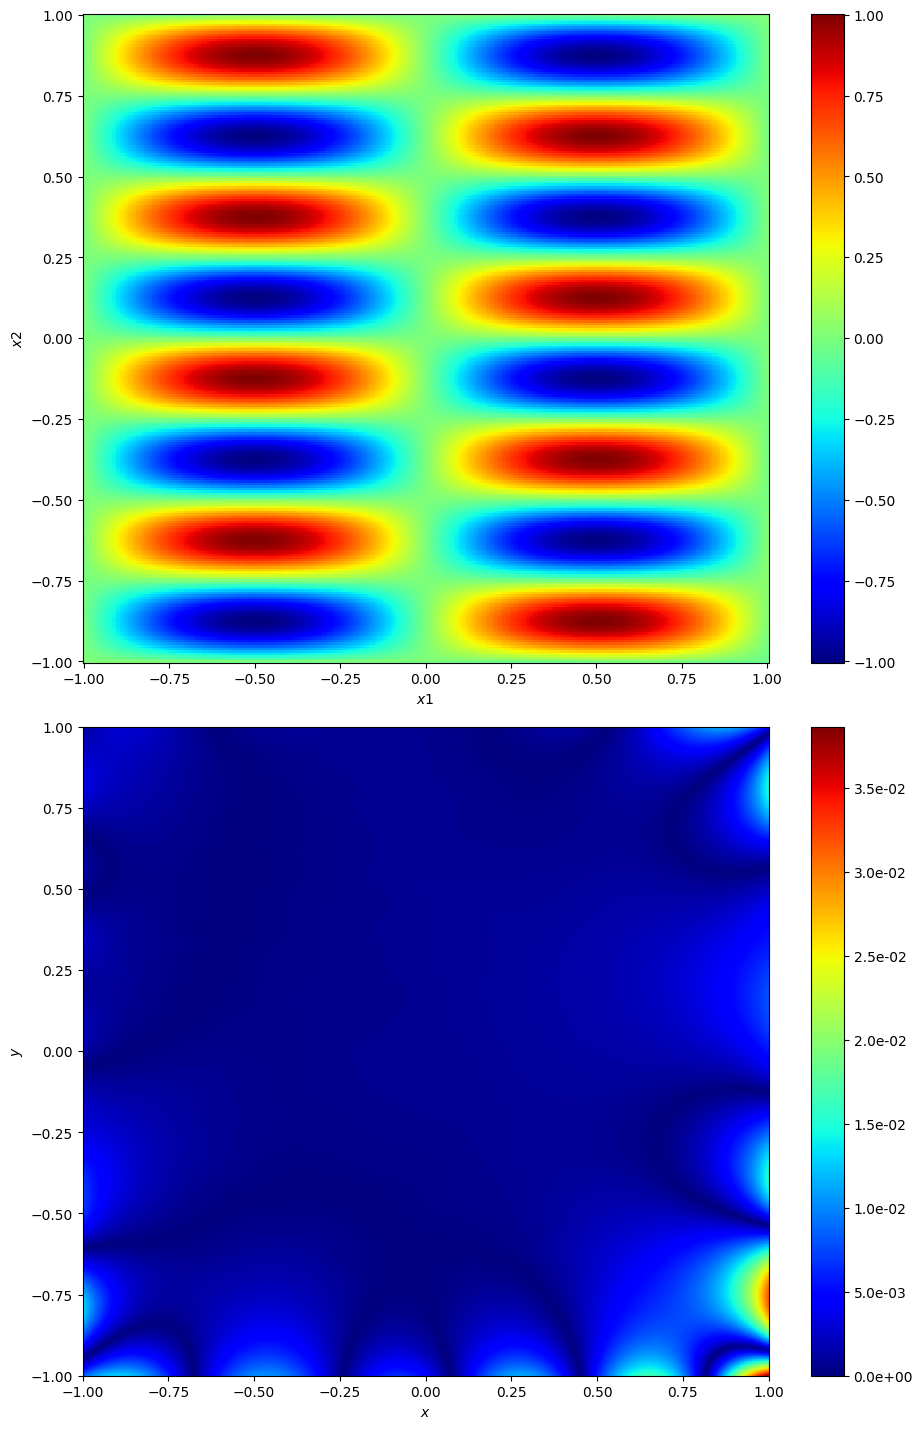

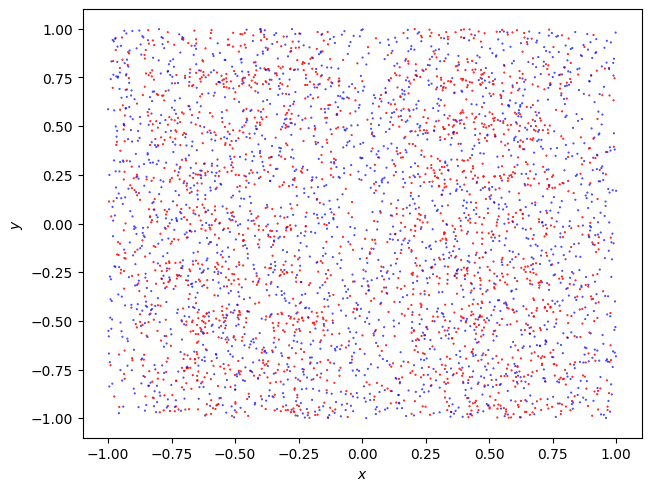

In [1]:
import os
import time
import numpy as np
import torch
from matplotlib import pyplot as plt, gridspec
from torch import nn
from torch.autograd import Variable
from tqdm import tqdm, trange
from pyDOE import lhs
from collections import OrderedDict
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'
seed = 1234
torch.set_default_dtype(torch.float)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
device = torch.device('cuda')
use_gpu = torch.cuda.is_available()
print('GPU:', use_gpu)


def random_fun(num):
    temp = torch.from_numpy(lb + (ub - lb) * lhs(2, num)).float()
    if use_gpu:
        temp = temp.cuda()
    return temp


def is_cuda(data):
    if use_gpu:
        data = data.cuda()
    return data

def sinAddcos(x):
    return 0.5 * (torch.sin(x) + torch.cos(x))

# class Net(nn.Module):

#     def __init__(self, layers):
#         super(Net, self).__init__()
#         self.layers = layers
#         self.indim = layers[0]
#         self.outdim = layers[-1]
#         self.hidden_units = layers[1:-1]
#         self.dense_layers = nn.ModuleList()
#         self.iter = 0
#         # if isinstance(hidden_units, int):
#         #     hidden_units = [hidden_units]
#         # print(f"hidden_units inside Dense_ScaleNet: {hidden_units}, type: {type(hidden_units)}")

#         input_layer = nn.Linear(self.indim, self.hidden_units[0])
#         nn.init.xavier_normal_(input_layer.weight)
#         nn.init.uniform_(input_layer.bias, -1, 1)
#         self.dense_layers.append(input_layer)

#         for i_layer in range(len(self.hidden_units) - 1):
#             if i_layer == 0:
#                 hidden_layer = nn.Linear(2 * self.hidden_units[i_layer], self.hidden_units[i_layer + 1])
#                 nn.init.xavier_normal_(hidden_layer.weight)
#                 nn.init.uniform_(hidden_layer.bias, -1, 1)
#             else:
#                 hidden_layer = nn.Linear(self.hidden_units[i_layer], self.hidden_units[i_layer + 1])
#                 nn.init.xavier_normal_(hidden_layer.weight)
#                 nn.init.uniform_(hidden_layer.bias, -1, 1)
#             self.dense_layers.append(hidden_layer)

#         out_layer = nn.Linear(self.hidden_units[-1], self.outdim)
#         nn.init.xavier_normal_(out_layer.weight)
#         nn.init.uniform_(out_layer.bias, -1, 1)
#         self.dense_layers.append(out_layer)

#     def forward(self, inputs, sFourier=0.5):
#         # ------ dealing with the input data ---------------
#         scale= [30,31,32,33,34,35,36,37,38,39,40,41,42,42,43,44,45,46,46,47,48,49]
#         # scale= np.arange(1, 30)
#         #scale = [1, 2, 4, 6, 8]

#         dense_in = self.dense_layers[0]
#         H = dense_in(inputs)

#         Unit_num = int(self.hidden_units[0] / len(scale))
#         mixcoe = np.repeat(scale, Unit_num)
#         mixcoe = np.concatenate((mixcoe, np.ones([self.hidden_units[0] - Unit_num * len(scale)]) * scale[-1]))
#         mixcoe = mixcoe.astype(np.float32)
#         torch_mixcoe = torch.from_numpy(mixcoe)
#         torch_mixcoe = torch_mixcoe.to(device)
#         H = sFourier * torch.cat([torch.cos(H * torch_mixcoe), torch.sin(H * torch_mixcoe)], dim=-1)

#         #  ---resnet(one-step skip connection for two consecutive layers if have equal neurons）---
#         # hiddens_record = self.hidden_units[0]
#         for k in range(len(self.hidden_units) - 1):
#             # H_pre = H
#             dense_layer = self.dense_layers[k + 1]
#             H = dense_layer(H)
#             H = sinAddcos(H)
#             # if (self.hidden_units[k+1] == hiddens_record) and (k != 0):
#             #     H = H + H_pre
#             # hiddens_record = self.hidden_units[k+1]

#         dense_out = self.dense_layers[-1]
#         H = dense_out(H)
#         out_results = H
#         return out_results
    
class Net(nn.Module):
    def __init__(self, layers):
        super(Net, self).__init__()
        self.layers = layers
        self.iter = 0
        self.activation = nn.Tanh()
        self.linear = nn.ModuleList([nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        for i in range(len(layers) - 1):
            nn.init.xavier_normal_(self.linear[i].weight.data, gain=1.0)
            nn.init.zeros_(self.linear[i].bias.data)

    def forward(self, x):
        if not torch.is_tensor(x):
            x = torch.from_numpy(x)
        a = self.activation(self.linear[0](x))
        for i in range(1, len(self.layers) - 2):
            z = self.linear[i](a)
            a = self.activation(z)
        a = self.linear[-1](a)
        return a

class Model:
    def __init__(self, net, x_label, x_labels, x_f_loss_fun,
                 x_test, x_test_exact
                 ):

        self.x_label_s = None
        self.x_f_s = None
        self.s_collect = []

        self.optimizer_LBGFS = None
        self.net = net

        self.x_label = x_label
        self.x_labels = x_labels

        self.x_f_N = None
        self.x_f_M = None

        self.x_f_loss_fun = x_f_loss_fun

        self.x_test = x_test
        self.x_test_exact = x_test_exact

        self.start_loss_collect = False
        self.x_label_loss_collect = []
        self.x_f_loss_collect = []
        self.x_test_estimate_collect = []
        self.l2_collect = []

    def train_U(self, x):
        return self.net(x)

    def predict_U(self, x):
        return self.train_U(x)

    def likelihood_loss(self, loss_e, loss_l):
        loss = torch.exp(-self.x_f_s) * loss_e.detach() + self.x_f_s \
               + torch.exp(-self.x_label_s) * loss_l.detach() + self.x_label_s
        return loss

    def true_loss(self, loss_e, loss_l):
        return torch.exp(-self.x_f_s.detach()) * loss_e + torch.exp(-self.x_label_s.detach()) * loss_l

    # computer backward loss
    def epoch_loss(self):
        x_f = torch.cat((self.x_f_N, self.x_f_M), dim=0)
        loss_equation = torch.mean(self.x_f_loss_fun(x_f, self.train_U) ** 2)

        loss_label = torch.mean((self.train_U(self.x_label) - self.x_labels) ** 2)

        if self.start_loss_collect:
            self.x_f_loss_collect.append([self.net.iter, loss_equation.item()])
            self.x_label_loss_collect.append([self.net.iter, loss_label.item()])
        return loss_equation, loss_label

    # computer backward loss
    def LBGFS_epoch_loss(self):
        self.optimizer_LBGFS.zero_grad()
        x_f = torch.cat((self.x_f_N, self.x_f_M), dim=0)
        loss_equation = torch.mean(self.x_f_loss_fun(x_f, self.train_U) ** 2)
        loss_label = torch.mean((self.train_U(self.x_label) - self.x_labels) ** 2)

        if self.start_loss_collect:
            self.x_f_loss_collect.append([self.net.iter, loss_equation.item()])
            self.x_label_loss_collect.append([self.net.iter, loss_label.item()])

        loss = self.true_loss(loss_equation, loss_label)
        loss.backward()
        # error = self.evaluate()
        # self.l2_collect.append([self.net.iter, error])
        self.net.iter += 1
        # error = self.evaluate()
        # self.l2_collect.append([self.net.iter, error])
        if self.net.iter % 1000 == 0:
            print('Iter:', self.net.iter, 'Loss:', loss.item())
        #print('Iter:', self.net.iter, 'Loss:', loss.item())
        return loss

    def evaluate(self):
        pred = self.train_U(self.x_test).cpu().detach().numpy()
        exact = self.x_test_exact.cpu().detach().numpy()
        error = np.linalg.norm(pred - exact, 2) / np.linalg.norm(exact, 2)
        return error

    def run_baseline(self):
        optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
        self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                 max_iter=lbgfs_iter)
        pbar = trange(adam_iter, ncols=100)
        for i in pbar:
            optimizer_adam.zero_grad()
            loss_e, loss_label = self.epoch_loss()
            loss = self.true_loss(loss_e, loss_label)
            loss.backward()
            optimizer_adam.step()
            self.net.iter += 1
            pbar.set_postfix({'Iter': self.net.iter,
                              'Loss': '{0:.2e}'.format(loss.item())
                              })

        print('Adam done!')
        self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
        print('LBGFS done!')

        error = self.evaluate()
        print('Test_L2error:', '{0:.2e}'.format(error))

    def run_AM(self):
        for move_count in range(AM_count):
            self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                     max_iter=lbgfs_iter)
            optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
            pbar = trange(adam_iter, ncols=100)

            for i in pbar:
                optimizer_adam.zero_grad()
                loss_equation, loss_label = self.epoch_loss()
                loss = self.true_loss(loss_equation, loss_label)
                loss.backward()
                # error = self.evaluate()
                # self.l2_collect.append([self.net.iter, error])
                self.net.iter += 1
                
                optimizer_adam.step()
                pbar.set_postfix({'Iter': self.net.iter,
                                  'Loss': '{0:.2e}'.format(loss.item())
                                  })

            print('Adam done!')
            # if move_count == AM_count-1:
            #     self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            #     print('LBGFS done!')
            self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            print('LBGFS done!')

            error = self.evaluate()
            print('change_counts', move_count, 'Test_L2error:', '{0:.2e}'.format(error))
            self.x_test_estimate_collect.append([move_count, '{0:.2e}'.format(error)])

            if AM_type == 0:
                x_init = random_fun(100000)
                x_init_residual = abs(self.x_f_loss_fun(x_init, self.train_U))
                x_init_residual = x_init_residual.cpu().detach().numpy()
                err_eq = np.power(x_init_residual, AM_K) / np.power(x_init_residual, AM_K).mean()
                err_eq_normalized = (err_eq / sum(err_eq))[:, 0]
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=err_eq_normalized)
                self.x_f_M = x_init[X_ids]

            elif AM_type == 1:
                x_init = random_fun(100000)
                x = Variable(x_init, requires_grad=True)
                u = self.train_U(x)
                dx = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
                grad_x1 = dx[:, [0]].squeeze()
                grad_x2 = dx[:, [1]].squeeze()
                dx = torch.sqrt(1 + grad_x1 ** 2 + grad_x2 ** 2).cpu().detach().numpy()
                err_dx = np.power(dx, AM_K) / np.power(dx, AM_K).mean()
                p = (err_dx / sum(err_dx))
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=p)
                self.x_f_M = x_init[X_ids]

    def run_AM_AW1(self):
        self.x_f_s = nn.Parameter(self.x_f_s, requires_grad=True)
        self.x_label_s = nn.Parameter(self.x_label_s, requires_grad=True)

        for move_count in range(AM_count):
            self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                     max_iter=lbgfs_iter)
            optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)
            optimizer_adam_weight = torch.optim.Adam([self.x_f_s] + [self.x_label_s],
                                                     lr=AW_lr)

            pbar = trange(adam_iter, ncols=100)
            for i in pbar:
                self.s_collect.append([self.net.iter, self.x_f_s.item(), self.x_label_s.item()])

                loss_e, loss_label = self.epoch_loss()

                optimizer_adam.zero_grad()
                loss = self.true_loss(loss_e, loss_label)
                loss.backward()
                optimizer_adam.step()
                self.net.iter += 1
                # error = self.evaluate()
                # self.l2_collect.append([self.net.iter, error])
                pbar.set_postfix({'Iter': self.net.iter,
                                  'Loss': '{0:.2e}'.format(loss.item())
                                  })

                optimizer_adam_weight.zero_grad()
                loss = self.likelihood_loss(loss_e, loss_label)
                loss.backward()
                optimizer_adam_weight.step()

            print('Adam done!')
            # if move_count == AM_count-1:
            #     self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            #     print('LBGFS done!')
            self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
            print('LBGFS done!')

            error = self.evaluate()
            print('change_counts', move_count, 'Test_L2error:', '{0:.2e}'.format(error))
            self.x_test_estimate_collect.append([move_count, '{0:.2e}'.format(error)])

            if AM_type == 0:
                x_init = random_fun(100000)
                x_init_residual = abs(self.x_f_loss_fun(x_init, self.train_U))
                x_init_residual = x_init_residual.cpu().detach().numpy()
                err_eq = np.power(x_init_residual, AM_K) / np.power(x_init_residual, AM_K).mean()
                err_eq_normalized = (err_eq / sum(err_eq))[:, 0]
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=err_eq_normalized)
                self.x_f_M = x_init[X_ids]

            elif AM_type == 1:
                x_init = random_fun(100000)
                x = Variable(x_init, requires_grad=True)
                u = self.train_U(x)
                dx = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
                grad_x1 = dx[:, [0]].squeeze()
                grad_x2 = dx[:, [1]].squeeze()
                dx = torch.sqrt(1 + grad_x1 ** 2 + grad_x2 ** 2).cpu().detach().numpy()
                err_dx = np.power(dx, AM_K) / np.power(dx, AM_K).mean()
                p = (err_dx / sum(err_dx))
                X_ids = np.random.choice(a=len(x_init), size=M, replace=False, p=p)
                self.x_f_M = x_init[X_ids]

    def run_AM_AW(self):
        self.run_AM()
        self.net.iter = 0
        self.start_loss_collect = True
        print('AW start!')
        self.x_f_s = nn.Parameter(self.x_f_s, requires_grad=True)
        self.x_label_s = nn.Parameter(self.x_label_s, requires_grad=True)

        optimizer_adam_weight = torch.optim.Adam([self.x_f_s] + [self.x_label_s],
                                                 lr=AW_lr)

        self.optimizer_LBGFS = torch.optim.LBFGS(self.net.parameters(), lr=lbgfs_lr,
                                                 max_iter=lbgfs_iter)
        optimizer_adam = torch.optim.Adam(self.net.parameters(), lr=adam_lr)

        pbar = trange(adam_iter, ncols=100)
        for i in pbar:
            self.s_collect.append([self.net.iter, self.x_f_s.item(), self.x_label_s.item()])

            loss_e, loss_label = self.epoch_loss()

            optimizer_adam.zero_grad()
            loss = self.true_loss(loss_e, loss_label)
            loss.backward()
            optimizer_adam.step()
            self.net.iter += 1
            pbar.set_postfix({'Iter': self.net.iter,
                              'Loss': '{0:.2e}'.format(loss.item())
                              })

            optimizer_adam_weight.zero_grad()
            loss = self.likelihood_loss(loss_e, loss_label)
            loss.backward()
            optimizer_adam_weight.step()

        print('Adam done!')
        self.optimizer_LBGFS.step(self.LBGFS_epoch_loss)
        print('LBGFS done!')

        error = self.evaluate()
        print('change_counts', -1, 'Test_L2error:', '{0:.2e}'.format(error))
        self.x_test_estimate_collect.append([-1, '{0:.2e}'.format(error)])

    def train(self):

        self.x_f_N = random_fun(N)
        self.x_f_M = random_fun(M)

        # self.x_f_s = is_cuda(-torch.log(torch.tensor(1.).float()))
        # self.x_label_s = is_cuda(
        #     -torch.log(torch.tensor(100.).float()))  # 0.5*torch.exp(-self.x_label_s.detach()) = 100

        self.x_f_s = is_cuda(torch.tensor(0.).float())
        self.x_label_s = is_cuda(torch.tensor(0.).float())

        start_time = time.time()
        if model_type == 0:
            self.run_baseline()
        elif model_type == 1:
            self.run_AM()
        elif model_type == 2:
            self.run_AM_AW1()
        elapsed = time.time() - start_time
        print('Training time: %.2f' % elapsed)


def x_f_loss_fun(x, train_U):
    if not x.requires_grad:
        x = Variable(x, requires_grad=True)
    u = train_U(x)
    d = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)
    u_x1 = d[0][:, 0].unsqueeze(-1)
    u_x2 = d[0][:, 1].unsqueeze(-1)
    u_x1x1 = torch.autograd.grad(u_x1, x, grad_outputs=torch.ones_like(u_x1), create_graph=True)[0][:, 0].unsqueeze(-1)
    u_x2x2 = torch.autograd.grad(u_x2, x, grad_outputs=torch.ones_like(u_x2), create_graph=True)[0][:, 1].unsqueeze(-1)
    u_exact = torch.sin(a1 * torch.pi * x[:, [0]]) * torch.sin(a2 * torch.pi * x[:, [1]])
    f = -(a1 * torch.pi) ** 2 * u_exact - (a2 * torch.pi) ** 2 * u_exact + k ** 2 * u_exact - \
        (u_x1x1 + u_x2x2 + k ** 2 * u)
    return f


def draw_exact():
    # 获取预测值和精确值
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test_np = x_test_exact.cpu().detach().numpy()
    u_test = x_test_exact.cpu().detach().numpy()
    # 创建网格
    XX1, XX2 = np.meshgrid(x1, x2)

    
    fig = plt.figure(figsize=(9.6, 14.4))  # 宽度和高度都增大为原来的1.5倍

    # 第一个子图：Predicted Solution
    plt.subplot(2, 1, 1)  # 1行2列，第1个位置
    e = np.reshape(predict_np, (XX1.shape[0], XX1.shape[1]))
    plt.pcolormesh(XX1, XX2, e, shading='auto', cmap='jet')
    plt.colorbar()
    # e = np.reshape(predict_np, (XX1.shape[0], XX1.shape[1]))
    # plot = plt.pcolormesh(XX1, XX2, e, shading='gouraud', cmap='jet', vmin=0, vmax=np.max(e))
    # plt.colorbar(plot, format="%1.1e")
    plt.xlabel('$x1$')
    plt.ylabel('$x2$')
    #plt.title(r'Pred $u(x)$')

    # 第二个子图：Error
    plt.subplot(2, 1, 2)  # 1行2列，第2个位置
    e = np.reshape(abs(predict_np - u_test), (XX1.shape[0], XX1.shape[1]))
    plot = plt.pcolormesh(XX1, XX2, e, shading='gouraud', cmap='jet', vmin=0, vmax=np.max(e))
    plt.colorbar(plot, format="%1.1e")
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    #plt.title('$Error$')

    # 调整布局，确保图形不重叠
    plt.tight_layout()

    # 保存为PDF文件
    plt.savefig('Helmholtz_pred_and_error-GAD.pdf')

    # 显示图形
    plt.show()
    
def draw_points(points,N_points=None):
    points = points.cpu().detach().numpy()
    points_bc = x_bc.cpu().detach().numpy()
    if N_points is not None:
        adds = N_points.cpu().detach().numpy()
        #plt.plot(adds[:, [0]], adds[:, [1]], 'kx', markersize=4)
    fig, ax = plt.subplots(layout='constrained', figsize=(6.4, 4.8))
    xs, xe, ys, ye = lb[0], ub[0], lb[1], ub[1]
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.scatter(points[:, 0], points[:, 1], c='r', marker='.', s=np.ones_like(points[:, 0]), alpha=1.0)
    ax.scatter(adds[:, 0], adds[:, 1], c='b', marker='.', s=np.ones_like(adds[:, 0]), alpha=0.8)
    #ax.scatter(points_bc[:, 0], points_bc[:, 1], c='b', marker='.', s=np.ones_like(points_bc[:, 0]), alpha=0.3)
    #ax.legend(loc='upper right', fontsize=12)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.savefig('Hel-GAD.pdf')
    plt.show()    

def draw_exact_points(points, N_points=None, show_exact=True):
    if show_exact:
        u_test_np = x_test_exact.cpu().detach().numpy()
        XX1, XX2 = np.meshgrid(x1, x2)
        e = np.reshape(u_test_np, (XX1.shape[0], XX1.shape[1]))
        plt.pcolor(XX1, XX2, e, shading='auto', cmap='jet')
        plt.colorbar()
        plt.title(r'Exact $u(x,y)$')
    if N_points is not None:
        adds = N_points.cpu().detach().numpy()
        plt.plot(adds[:, [0]], adds[:, [1]], 'kx', markersize=4, clip_on=False)

    points = points.cpu().detach().numpy()
    plt.plot(points[:, [0]], points[:, [1]], 'rx', markersize=4)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$y$', fontsize=20)
    plt.savefig('Helmholtz_xnm-WAM-AW.pdf')
    plt.show()


def draw_residual():
    f = x_f_loss_fun(x_test, model.train_U)
    f = f.cpu().detach().numpy()
    XX1, XX2 = np.meshgrid(x1, x2)
    e = np.reshape(abs(f), (XX1.shape[0], XX1.shape[1]))
    plt.pcolor(XX1, XX2, e, shading='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$y$', fontsize=20)
    plt.title('$Residual$', fontsize=20)
    plt.tight_layout()
    plt.savefig('Helmholtz_residual-WAM-AW.pdf')
    plt.show()


def draw_error():
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test = x_test_exact.cpu().detach().numpy()
    XX1, XX2 = np.meshgrid(x1, x2)
    e = np.reshape(abs(predict_np - u_test), (XX1.shape[0], XX1.shape[1]))
    plt.pcolor(XX1, XX2, e, shading='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$y$', fontsize=20)
    plt.title('$Error$', fontsize=20)
    plt.tight_layout()
    plt.savefig('Helmholtz_error-WAM-AW.pdf')
    plt.show()


def draw_epoch_loss():
    x_label_loss_collect = np.array(model.x_label_loss_collect)
    x_f_loss_collect = np.array(model.x_f_loss_collect)
    plt.subplot(2, 1, 1)
    plt.yscale('log')
    plt.plot(x_label_loss_collect[:, 0], x_label_loss_collect[:, 1], 'b-', label='Label_loss')
    plt.xlabel('$Epoch$')
    plt.ylabel('$Loss$')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.yscale('log')
    plt.plot(x_f_loss_collect[:, 0], x_f_loss_collect[:, 1], 'r-', label='PDE_loss')
    plt.xlabel('$Epoch$')
    plt.ylabel('$Loss$')
    plt.legend()
    plt.show()


def draw_epoch_w():
    s_collect = np.array(model.s_collect)
    np.savetxt('s_WAM-AW.npy', s_collect)
    plt.rc('legend', fontsize=16)
    plt.yscale('log')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 1]), 'b-', label='$e^{-s_{r}}$')
    plt.plot(s_collect[:, 0], np.exp(-s_collect[:, 2]), 'r-', label='$e^{-s_{b}}$')
    plt.xlabel('$Iters$', fontsize=20)
    plt.ylabel('$\lambda$', fontsize=20)
    plt.legend()
    plt.savefig('Helmholtz_S_WAM-AW.pdf', fontsize=20)
    plt.show()



def draw_some_t():
    predict_np = model.predict_U(x_test).cpu().detach().numpy()
    u_test_np = x_test_exact.cpu().detach().numpy()
    XX1, XX2 = np.meshgrid(x1, x2)
    u_pred = np.reshape(predict_np, (XX1.shape[0], XX1.shape[1]))
    u_test = np.reshape(u_test_np, (XX1.shape[0], XX1.shape[1]))
    gs1 = gridspec.GridSpec(2, 2)

    ax = plt.subplot(gs1[0, 0])
    ax.plot(x2, u_test.T[int((rc1 + 1) / (2 / 256)), :], 'b-', linewidth=2, label='Exact')
    ax.plot(x2, u_pred.T[int((rc1 + 1) / (2 / 256)), :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$y$', fontsize=20)
    ax.set_ylabel('$u(x,y)$', fontsize=20)
    ax.set_title('$x = ' + str(rc1) + '$', fontsize=20)
    ax.axis('square')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    ax = plt.subplot(gs1[0, 1])
    ax.plot(x2, u_test.T[:, int((rc2 + 1) / (2 / 256))], 'b-', linewidth=2, label='Exact')
    ax.plot(x2, u_pred.T[:, int((rc2 + 1) / (2 / 256))], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,y)$', fontsize=20)
    ax.set_title('$y = ' + str(rc2) + '$', fontsize=20)
    ax.axis('square')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    ax = plt.subplot(gs1[1, 0])
    ax.plot(x2, u_test.T[int((rc3 + 1) / (2 / 256)), :], 'b-', linewidth=2, label='Exact')
    ax.plot(x2, u_pred.T[int((rc3 + 1) / (2 / 256)), :], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$y$', fontsize=20)
    ax.set_ylabel('$u(x,y)$', fontsize=20)
    ax.set_title('$x = ' + str(rc3) + '$', fontsize=20)
    ax.axis('square')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    ax = plt.subplot(gs1[1, 1])
    ax.plot(x2, u_test.T[:, int((rc4 + 1) / (2 / 256))], 'b-', linewidth=2, label='Exact')
    ax.plot(x2, u_pred.T[:, int((rc4 + 1) / (2 / 256))], 'r--', linewidth=2, label='Prediction')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$u(x,y)$', fontsize=20)
    ax.set_title('$y = ' + str(rc4) + '$', fontsize=20)
    ax.axis('square')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    plt.tight_layout()
    plt.savefig('Helmholtz_qie-WAM-AW.pdf')
    plt.show()
    
def draw_l2_loss():
    l2= np.array(model.l2_collect)
    plt.yscale('log')
    plt.plot(l2[:, 0], l2[:, 1], 'r-', label='relative L2')
    plt.xlabel('$Epoch$')
    plt.ylabel('$Loss$')
    plt.legend()
    plt.show()

# def draw_l2_loss():
#     relatie_error= np.array(model.l2_collect)
#     fig_1 = plt.figure(1)
#     ax = fig_1.add_subplot(1, 1, 1)
#     ax.plot(relatie_error, 'r')
#     ax.set_yscale('log')
#     ax.set_xlabel('iterations')
#     ax.set_ylabel('relative_error')
#     plt.legend()
#     plt.grid(linestyle=":")
#     plt.tight_layout()
#     plt.show()


if __name__ == '__main__':
    lb = np.array([-1.0, -1.0])
    ub = np.array([1.0, 1.0])

    #layers = [2, 200, 200, 200, 200, 200, 1]
    layers = [2, 40, 40, 40, 40, 40, 1]
    #layers = [2, 125, 200, 100, 100, 80,1]
    net = is_cuda(Net(layers))

    N = 2000
    M = 2000
    Nbc = 125

    adam_iter, lbgfs_iter = 5000, 50000
    adam_lr, lbgfs_lr = 0.001, 0.5

    model_type = 1 # 0:baseline  1:AM  2:AM_AW

    AM_type = 1  # 0:RAM  1:WAM
    AM_K = 1
    AM_count = 10

    AW_lr = 0.001

    # test data
    k = 1
    a1 = 1
    a2 = 4

    rc1 = 0.5
    rc2 = 0.3
    rc3 = -0.5
    rc4 = -0.3

    exact_u = lambda x: np.sin(a1 * np.pi * x[:, [0]]) * np.sin(a2 * np.pi * x[:, [1]])
    x1 = np.expand_dims(np.linspace(-1, 1, 256), axis=1)
    x2 = np.expand_dims(np.linspace(-1, 1, 256), axis=1)
    X1, X2 = np.meshgrid(x1, x2)

    x_test_np = np.concatenate((np.vstack(np.expand_dims(X1, axis=2)), np.vstack(np.expand_dims(X2, axis=2))), axis=-1)
    solution = exact_u(x_test_np)
    x_test = is_cuda(torch.from_numpy(x_test_np).float())
    x_test_exact = is_cuda(torch.from_numpy(solution).float())

    # bc data
    x1_boundary_left = torch.cat((torch.full([Nbc, 1], -1), torch.full([Nbc, 1], -1) + torch.rand([Nbc, 1]) * 2), dim=1)
    x1_boundary_right = torch.cat((torch.full([Nbc, 1], 1), torch.full([Nbc, 1], -1) + torch.rand([Nbc, 1]) * 2), dim=1)
    x2_boundary_left = torch.cat((torch.full([Nbc, 1], -1) + torch.rand([Nbc, 1]) * 2, torch.full([Nbc, 1], -1)), dim=1)
    x2_boundary_right = torch.cat((torch.full([Nbc, 1], -1) + torch.rand([Nbc, 1]) * 2, torch.full([Nbc, 1], 1)), dim=1)

    x1_boundary_left_label = torch.from_numpy(exact_u(x1_boundary_left.numpy())).float()
    x1_boundary_right_label = torch.from_numpy(exact_u(x1_boundary_right.numpy())).float()
    x2_boundary_left_label = torch.from_numpy(exact_u(x2_boundary_left.numpy())).float()
    x2_boundary_right_label = torch.from_numpy(exact_u(x2_boundary_right.numpy())).float()

    x_bc = is_cuda(torch.cat((x1_boundary_left, x1_boundary_right, x2_boundary_left, x2_boundary_right), dim=0))
    u_bc = is_cuda(torch.cat(
        (x1_boundary_left_label, x1_boundary_right_label, x2_boundary_left_label, x2_boundary_right_label), dim=0))

    model = Model(
        net=net,
        x_label=x_bc,
        x_labels=u_bc,
        x_f_loss_fun=x_f_loss_fun,
        x_test=x_test,
        x_test_exact=x_test_exact,
    )

    model.train()
    print(model.x_test_estimate_collect)

    draw_exact()
    draw_points(model.x_f_M,N_points=model.x_f_N)
    # # draw_exact_points(model.x_f_M)
    #draw_exact_points(model.x_f_M, show_exact=False)
    # # draw_exact_points(model.x_f_M, N_points=model.x_f_N)
    # # draw_exact_points(model.x_f_M, N_points=model.x_f_N, show_exact=False)
    #draw_residual()
    #draw_error()
    #draw_some_t()
    #draw_l2_loss()
    # draw_epoch_loss()
    #draw_epoch_w()                                                                                                                                                                                                                                                                                                                                                  
